In [1]:
import pandas as pd
import numpy as np
original_data_path = "original_data/bank-additional-full.csv"

In [2]:
bank_data_small = pd.read_csv(original_data_path,sep=";") 
print(bank_data_small.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
#查看数值型数据的分布情况
print(bank_data_small.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [4]:
#查看字符型属性缺失情况
for col in bank_data_small.columns:
    if bank_data_small[col].dtype == object:
        print("Percentage of \"unknown\" in %s：" %col ,bank_data_small[bank_data_small[col] == "unknown"][col].count(),"/",bank_data_small[col].count())

Percentage of "unknown" in job： 330 / 41188
Percentage of "unknown" in marital： 80 / 41188
Percentage of "unknown" in education： 1731 / 41188
Percentage of "unknown" in default： 8597 / 41188
Percentage of "unknown" in housing： 990 / 41188
Percentage of "unknown" in loan： 990 / 41188
Percentage of "unknown" in contact： 0 / 41188
Percentage of "unknown" in month： 0 / 41188
Percentage of "unknown" in day_of_week： 0 / 41188
Percentage of "unknown" in poutcome： 0 / 41188
Percentage of "unknown" in y： 0 / 41188


In [5]:
#查看正负类样本占总样本数的比例
print("Yes:",bank_data_small['y'][bank_data_small['y']== 'yes'].count())
print("No:",bank_data_small['y'][bank_data_small['y']== 'no'].count())

Yes: 4640
No: 36548


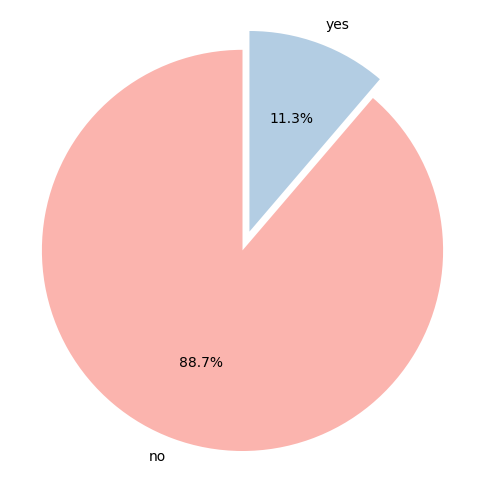

In [6]:
import matplotlib.pyplot as plt

target_counts = bank_data_small['y'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors, explode=(0.1, 0))
plt.axis('equal')
plt.show()

In [7]:
#查看字符型属性各个属性值所占的比例
for col in bank_data_small.columns:
    if bank_data_small[col].dtype == object:
        print(bank_data_small.groupby(bank_data_small[col]).apply(lambda x: x['y'][x['y']== 'yes'].count()/x['y'].count()))    

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
dtype: float64
marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
dtype: float64
education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
dtype: float64
default
no         0.12879
unknown    0.05153
yes        0.00000
dtype: float64
housing
no         0.108796
unknown    0.108081
yes        0.116194
dtype: float64
loan
no         0.113402
unknown    0.108081
yes        0.109315
dtype: float64
contact
cellular     0.147376
telephon

In [8]:
import matplotlib.pyplot as plt
print(bank_data_small[bank_data_small['y']=='yes']['age'].describe())
print(bank_data_small[bank_data_small['y']=='no']['age'].describe())

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64
count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64


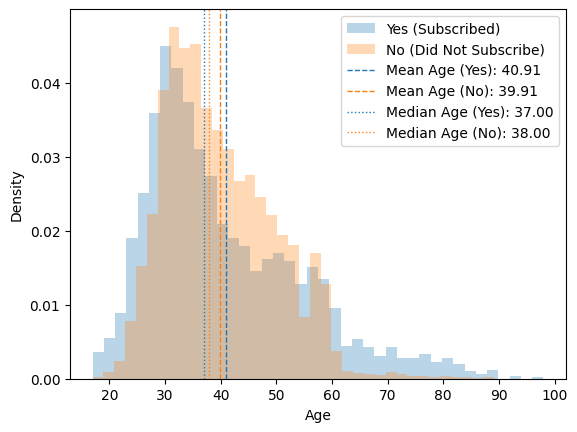

In [9]:
# 加中位数线
mean_age_yes = bank_data_small[bank_data_small['y']=='yes']['age'].mean()
mean_age_no = bank_data_small[bank_data_small['y']=='no']['age'].mean()
median_age_yes = bank_data_small[bank_data_small['y']=='yes']['age'].median()
median_age_no = bank_data_small[bank_data_small['y']=='no']['age'].median()

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

# 绘制直方图
plt.hist(bank_data_small[bank_data_small['y']=='yes']['age'], label="Yes (Subscribed)", **kwargs)
plt.hist(bank_data_small[bank_data_small['y']=='no']['age'], label="No (Did Not Subscribe)", **kwargs)
plt.axvline(mean_age_yes, color='C0', linestyle='dashed', linewidth=1, label=f'Mean Age (Yes): {mean_age_yes:.2f}')
plt.axvline(mean_age_no, color='C1', linestyle='dashed', linewidth=1, label=f'Mean Age (No): {mean_age_no:.2f}')
plt.axvline(median_age_yes, color='C0', linestyle='dotted', linewidth=1, label=f'Median Age (Yes): {median_age_yes:.2f}')
plt.axvline(median_age_no, color='C1', linestyle='dotted', linewidth=1, label=f'Median Age (No): {median_age_no:.2f}')

plt.legend()

plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

In [10]:
import pandas as pd
import numpy as np

# 选择所有数值型列
numerical_cols = bank_data_small.select_dtypes(include=[np.number]).columns.tolist()

# 按 'y' 分组计算描述性统计（这里选择均值和标准差作为代表）
summary_stats = bank_data_small.groupby('y')[numerical_cols].agg(['mean', 'std']).round(2)

# 重命名索引以更清晰
summary_stats.index = ['Not Subscribed (No)', 'Subscribed (Yes)']

# 展平列索引，使其更易读
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# 打印表格
print("Descriptive Statistics of Numerical Variables by Target (y):")
print(summary_stats)

Descriptive Statistics of Numerical Variables by Target (y):
                     age_mean  age_std  duration_mean  duration_std  \
Not Subscribed (No)     39.91     9.90         220.84        207.10   
Subscribed (Yes)        40.91    13.84         553.19        401.17   

                     campaign_mean  campaign_std  pdays_mean  pdays_std  \
Not Subscribed (No)           2.63          2.87      984.11     120.66   
Subscribed (Yes)              2.05          1.67      792.04     403.41   

                     previous_mean  previous_std  emp.var.rate_mean  \
Not Subscribed (No)           0.13          0.41               0.25   
Subscribed (Yes)              0.49          0.86              -1.23   

                     emp.var.rate_std  cons.price.idx_mean  \
Not Subscribed (No)              1.48                93.60   
Subscribed (Yes)                 1.62                93.35   

                     cons.price.idx_std  cons.conf.idx_mean  \
Not Subscribed (No)                

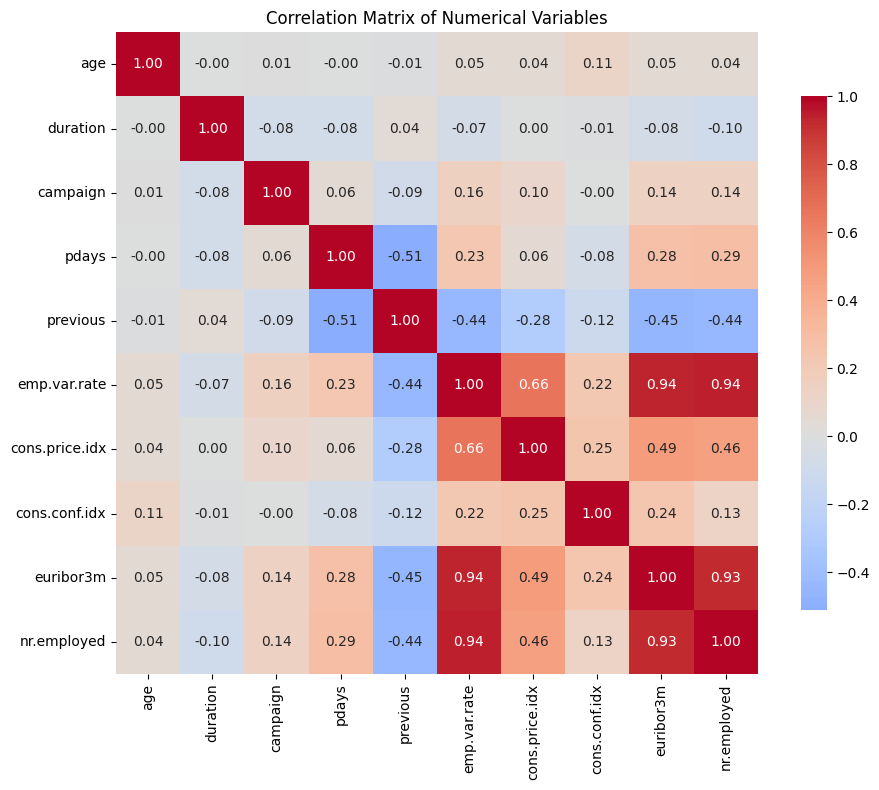

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算数值变量间的皮尔逊相关系数矩阵
correlation_matrix = bank_data_small[numerical_cols].corr(method='spearman') # 也可用 'pearson'

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout() # 确保标签不被裁切
plt.show()

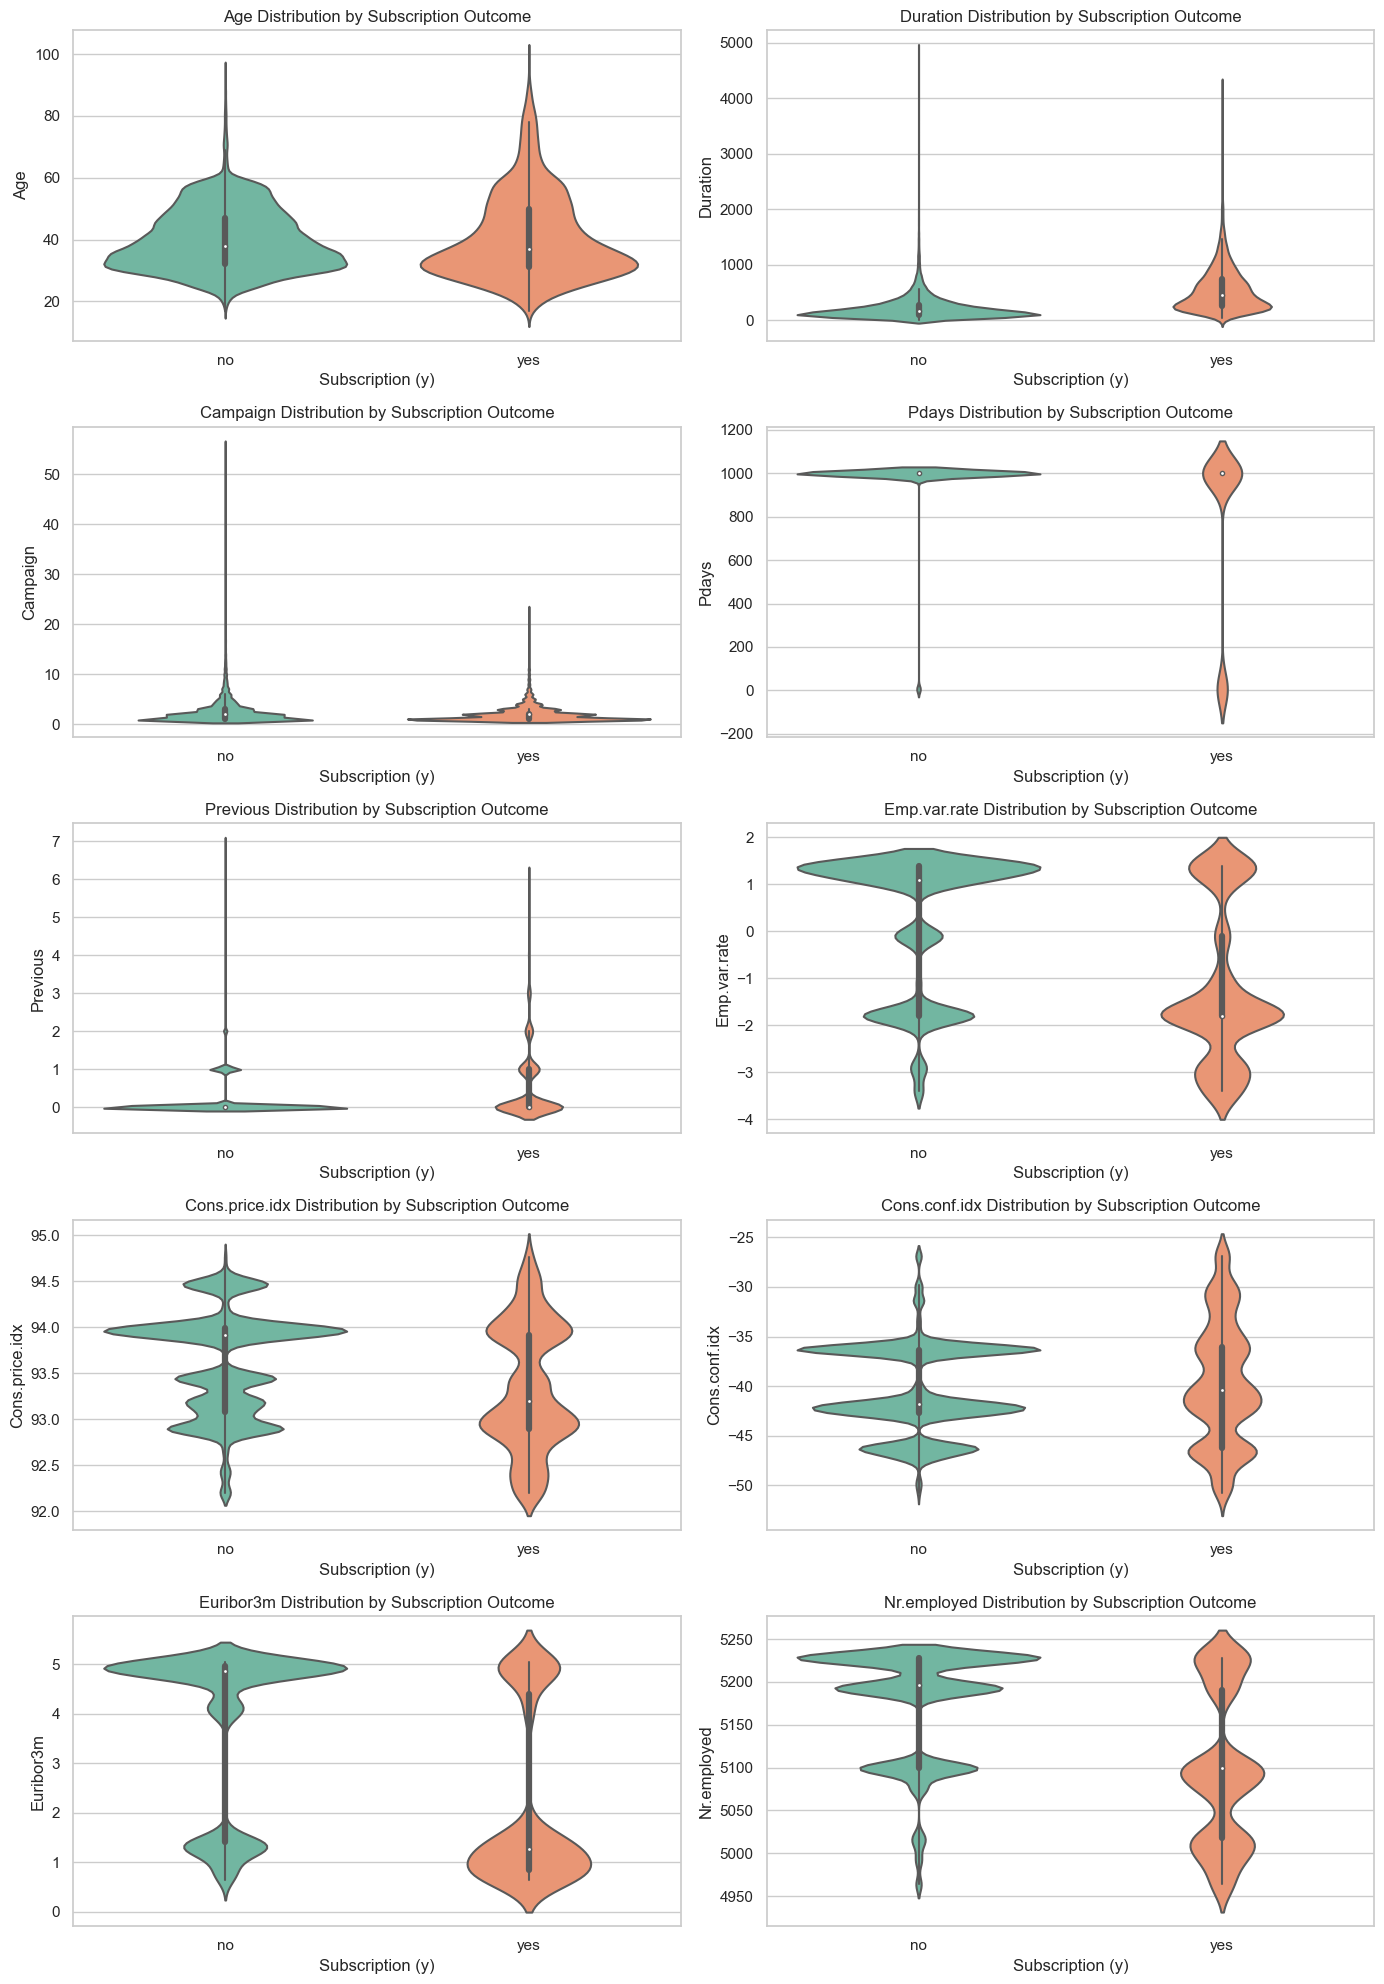

In [12]:
#小提琴图
import matplotlib.pyplot as plt
import seaborn as sns

# 选择数值型列（排除目标变量 y）
numeric_cols = bank_data_small.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'y']  # 确保不含 y

# 设置图形风格
sns.set(style="whitegrid")

# 创建子图网格：每行2个图，共 ceil(len/2) 行
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # 展平为一维数组，方便索引

# 遍历每个数值变量绘制小提琴图
for i, col in enumerate(numeric_cols):
    sns.violinplot(data=bank_data_small, x='y', y=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col.capitalize()} Distribution by Subscription Outcome')
    axes[i].set_xlabel('Subscription (y)')
    axes[i].set_ylabel(col.capitalize())

# 删除多余的子图（如果有的话）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('numeric_features_violin_by_y.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
job = bank_data_small[bank_data_small['y']=='yes'].groupby('job').count()['y'].index
job_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('job').count()['y']
job_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('job').count()['y']
print(job.values)
print(job_count_yes)
print(job_count_no)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
job
admin.           1352
blue-collar       638
entrepreneur      124
housemaid         106
management        328
retired           434
self-employed     149
services          323
student           275
technician        730
unemployed        144
unknown            37
Name: y, dtype: int64
job
admin.           9070
blue-collar      8616
entrepreneur     1332
housemaid         954
management       2596
retired          1286
self-employed    1272
services         3646
student           600
technician       6013
unemployed        870
unknown           293
Name: y, dtype: int64


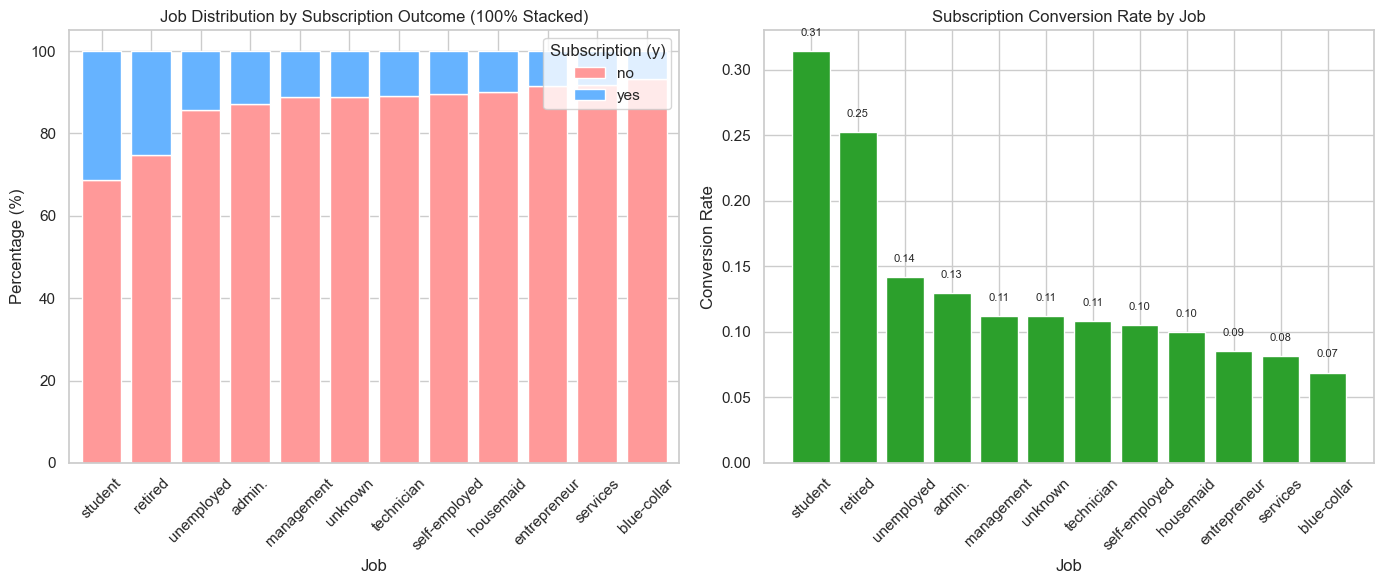

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 获取各职业的 yes 和 no 计数
job_counts = bank_data_small.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts = job_counts[['no', 'yes']]  # 确保顺序：no 在下，yes 在上

# 计算转化率（yes / total）
job_counts['total'] = job_counts['yes'] + job_counts['no']
job_counts['conversion_rate'] = job_counts['yes'] / job_counts['total']

# 排序：按转化率从高到低
job_counts = job_counts.sort_values('conversion_rate', ascending=False)

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- 左图：100% 堆叠柱状图 ---
# 计算百分比
job_pct = job_counts[['no', 'yes']].div(job_counts['total'], axis=0) * 100

job_pct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=ax1, width=0.8)
ax1.set_title('Job Distribution by Subscription Outcome (100% Stacked)')
ax1.set_ylabel('Percentage (%)')
ax1.set_xlabel('Job')
ax1.legend(title='Subscription (y)', loc='upper right')
ax1.tick_params(axis='x', rotation=45)

# --- 右图：转化率条形图 ---
ax2.bar(job_pct.index, job_counts['conversion_rate'], color='#2ca02c', width=0.8)
ax2.set_title('Subscription Conversion Rate by Job')
ax2.set_ylabel('Conversion Rate')
ax2.set_xlabel('Job')
ax2.tick_params(axis='x', rotation=45)
# 可选：在柱子上标注具体转化率
for i, v in enumerate(job_counts['conversion_rate']):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('job_analysis_conversion_rate_and_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
marital = bank_data_small[bank_data_small['y']=='yes'].groupby('marital').count()['y'].index
marital_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('marital').count()['y']
marital_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('marital').count()['y']
print(marital.values)
print(marital_count_yes)
print(marital_count_no)

['divorced' 'married' 'single' 'unknown']
marital
divorced     476
married     2532
single      1620
unknown       12
Name: y, dtype: int64
marital
divorced     4136
married     22396
single       9948
unknown        68
Name: y, dtype: int64


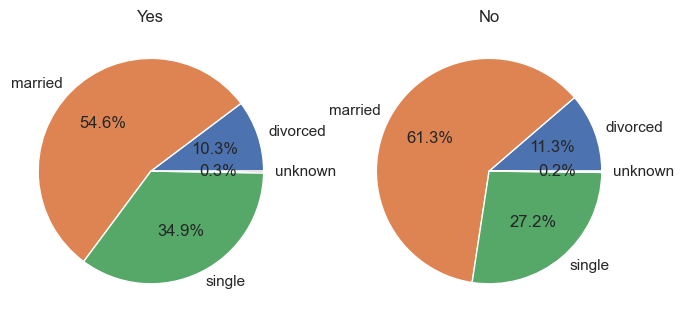

In [16]:
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.title('Yes')
plt.pie(marital_count_yes.values,labels = marital,autopct='%1.1f%%')
plt.subplot(122)
plt.title('No')
plt.pie(marital_count_no.values,labels = marital,autopct='%1.1f%%')
plt.show()

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 定义教育程度顺序（不含 'unknown'）
edu = ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school", "professional.course", "university.degree"]

# 获取计数，并过滤掉 'unknown'
education_count_yes = bank_data_small[bank_data_small['y']=='yes'].groupby('education').count()['y']
education_count_no = bank_data_small[bank_data_small['y']=='no'].groupby('education').count()['y']

# 仅保留非 'unknown' 的类别
education_count_yes = education_count_yes[education_count_yes.index != 'unknown']
education_count_no = education_count_no[education_count_no.index != 'unknown']

# 按照指定顺序重排
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)

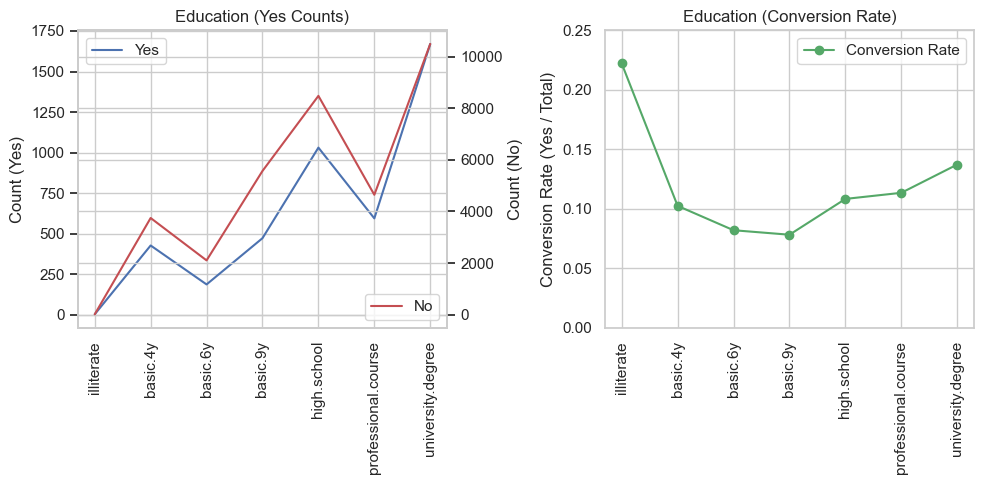

In [26]:
# --- 第一个图：双Y轴折线图（不含 unknown）---
y = education_count_yes
n = education_count_no

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(y.values, 'b', label="Yes")
ax1.set_xticks(np.arange(len(edu)))
ax1.set_xticklabels(edu, rotation=90)
ax1.set_ylabel('Count (Yes)')
ax1.set_title("Education (Yes Counts)")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(n.values, 'r', label="No")
ax2.set_ylabel('Count (No)')
ax2.legend(loc='lower right')

# --- 第二个图：转化率折线图（不含 unknown）---
ax3 = fig.add_subplot(122)
conversion_rate = y / (y + n)
ax3.plot(conversion_rate.values, 'g', marker='o', label='Conversion Rate')
ax3.set_xticks(np.arange(len(edu)))
ax3.set_xticklabels(edu, rotation=90)
ax3.set_ylabel('Conversion Rate (Yes / Total)')
ax3.set_title("Education (Conversion Rate)")
ax3.legend()
ax3.set_ylim(0, 0.25)

plt.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 获取 y='yes' 和 y='no' 的 duration 值
duration_yes = bank_data_small[bank_data_small['y']=='yes']['duration']
duration_no = bank_data_small[bank_data_small['y']=='no']['duration']

print("Descriptive Statistics for Duration (y='yes'):")
print(duration_yes.describe())
print("\nDescriptive Statistics for Duration (y='no'):")
print(duration_no.describe())

Descriptive Statistics for Duration (y='yes'):
count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

Descriptive Statistics for Duration (y='no'):
count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64


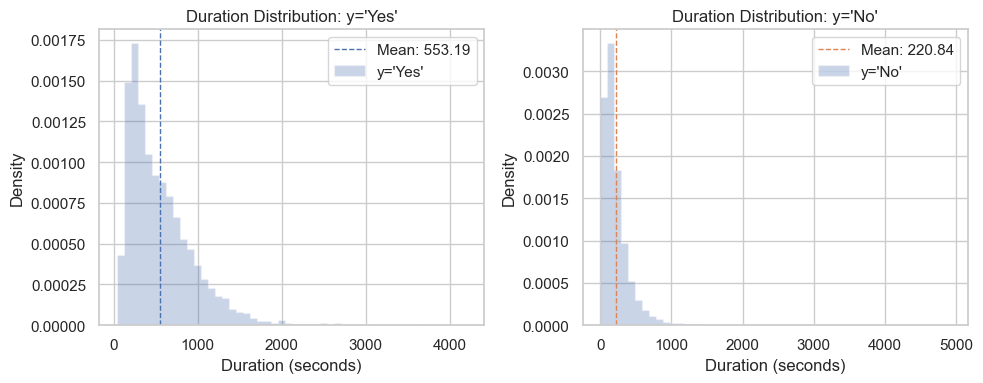

In [28]:
# 绘制分布直方图
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=50)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("Duration Distribution: y='Yes'")
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
# 添加均值线
mean_dur_yes = duration_yes.mean()
plt.axvline(mean_dur_yes, color='C0', linestyle='dashed', linewidth=1, label=f'Mean: {mean_dur_yes:.2f}')
plt.hist(duration_yes, label="y='Yes'", **kwargs)
plt.legend()

plt.subplot(122)
plt.title("Duration Distribution: y='No'")
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
# 添加均值线
mean_dur_no = duration_no.mean()
plt.axvline(mean_dur_no, color='C1', linestyle='dashed', linewidth=1, label=f'Mean: {mean_dur_no:.2f}')
plt.hist(duration_no, label="y='No'", **kwargs)
plt.legend()

plt.tight_layout()
plt.savefig('duration_distribution_by_y.png', dpi=300, bbox_inches='tight')
plt.show()

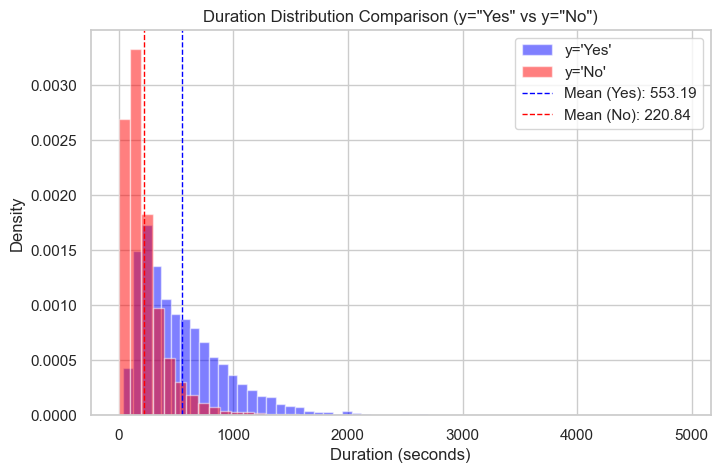

In [29]:
# 绘制一个图比较两组密度
plt.figure(figsize=(8, 5))
plt.hist(duration_yes, bins=50, alpha=0.5, density=True, label="y='Yes'", color='blue')
plt.hist(duration_no, bins=50, alpha=0.5, density=True, label="y='No'", color='red')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.title('Duration Distribution Comparison (y="Yes" vs y="No")')
plt.axvline(mean_dur_yes, color='blue', linestyle='dashed', linewidth=1, label=f'Mean (Yes): {mean_dur_yes:.2f}')
plt.axvline(mean_dur_no, color='red', linestyle='dashed', linewidth=1, label=f'Mean (No): {mean_dur_no:.2f}')
plt.legend()
plt.savefig('duration_comparison_density.png', dpi=300, bbox_inches='tight')
plt.show()